In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataMites/glass.csv')

In [ ]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
# prompt: Using dataframe data: rename 'Type' to 'Class'

data.rename(columns={'Type': 'Class'}, inplace=True)


In [ ]:
data['Class'].unique()

array([1, 2, 3, 5, 6, 7])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [18]:
data.isna().sum()

RI       0
Na       0
Mg       0
Al       0
Si       0
K        0
Ca       0
Ba       0
Fe       0
Class    0
dtype: int64

In [21]:
data.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Class'], dtype='object')

In [22]:
X = data.drop('Class',axis=1)
y = data['Class']

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [36]:
from sklearn.decomposition import PCA

pca = PCA()  # Choose the number of components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

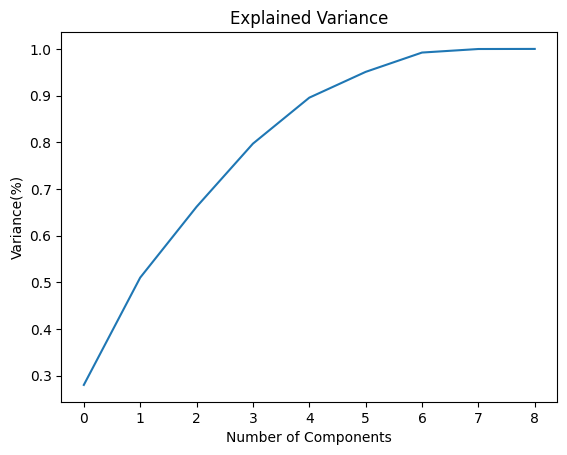

In [37]:
# Scree Plot

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))   # it takes fitted data
plt.xlabel('Number of Components')
plt.ylabel('Variance(%)')
plt.title('Explained Variance')
plt.show()

In [38]:
from sklearn.decomposition import PCA

pca1 = PCA(n_components=5)  # Choose the number of components
new_X_train_pca = pca1.fit_transform(X_train_scaled)
new_X_test_pca = pca1.transform(X_test_scaled)

In [42]:
new_X_train = pd.DataFrame(data=new_X_train_pca , columns=['PC1','PC2','PC3','PC4','PC5'])

In [45]:
new_X_test = pd.DataFrame(data= new_X_test_pca , columns=['PC1','PC2','PC3','PC4','PC5'])

In [57]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(new_X_train,y_train)

RandomForestClassifier()

In [58]:
y_preds = clf.predict(new_X_test)

In [59]:
from sklearn.metrics import classification_report,accuracy_score

print(classification_report(y_test,y_preds))
print(accuracy_score(y_test,y_preds))

              precision    recall  f1-score   support

           1       0.71      0.91      0.80        11
           2       0.71      0.71      0.71        14
           3       0.00      0.00      0.00         3
           5       0.75      0.75      0.75         4
           6       1.00      0.67      0.80         3
           7       0.78      0.88      0.82         8

    accuracy                           0.74        43
   macro avg       0.66      0.65      0.65        43
weighted avg       0.70      0.74      0.72        43

0.7441860465116279


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
